### Importing Libraries & Files

In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from glob import glob
%matplotlib inline 

In [49]:
tn = pd.read_csv("./zippedData2/tn_no_null") 

In [50]:
tmdb = pd.read_csv("./zippedData2/tmdb_df_no_null") 

In [51]:
bom = pd.read_csv("./zippedData2/new_bom_no_null") 

In [52]:
imdb = pd.read_csv("./zippedData2/imdb_r_no_null") 

In [53]:
print(tn.shape,tmdb.shape,bom.shape,imdb.shape) 

(5782, 11) (26517, 13) (3387, 5) (146018, 10)


In [54]:
tn.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,date_f,profit
0,78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,1915,2,8,1,20890000.0
1,24,1916-09-05,Intolerance,385907.0,0.0,0.0,1916,9,5,2,-385907.0


In [55]:
tmdb.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26


In [56]:
bom.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [57]:
imdb.head(2)

,primary_title,original_title,start_year,runtime_minutes,directors,writers,my_new_datetime,year,month,day
0,Sunghursh,Sunghursh,2013,175.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2013-01-01 01:01:01,2013,1,1
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,nm0002411,nm0002411,2019-01-01 01:01:01,2019,1,1


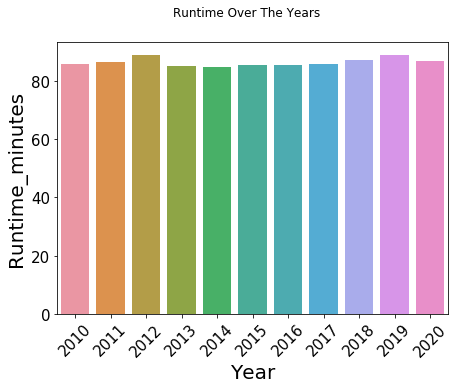

In [58]:
fig,ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x='year', y='runtime_minutes', data=imdb,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Runtime Over The Years', fontsize=12 )
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Runtime_minutes',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();

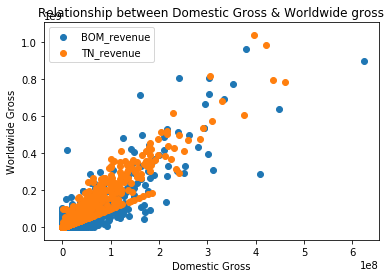

In [59]:
plt.scatter(bom['domestic_gross'][1:1000],bom['foreign_gross'][1:1000], label='BOM_revenue')
plt.scatter(tn['domestic_gross'][1:1000],tn['worldwide_gross'][1:1000], label='TN_revenue') 
plt.title('Relationship between Domestic Gross & Worldwide gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.legend()
plt.show() 

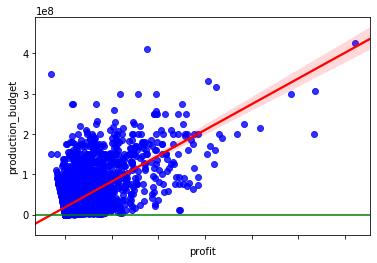

In [62]:
tn = tn.sort_values('release_date')
tn['date_f'] = pd.factorize(tn['release_date'])[0] + 1
mapping = dict(zip(tn['date_f'], tn['release_date']))

ax = sns.regplot('profit','production_budget', data=tn,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}) 
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.axhline(0,color='green')

In [ ]:
new_bom[['domestic_gross','foreign_gross','year']].plot(title = 'Domestic-Worldwide Trend',color=('DarkBlue','c','crimson'),linestyle=('-'),figsize=(10, 8));

In [64]:
bom.groupby(bom['year'])

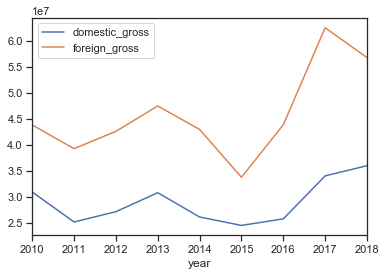

In [76]:
bom.groupby('year').mean().plot()

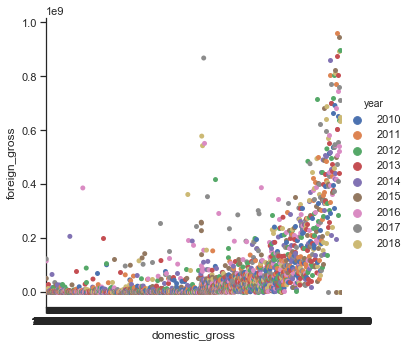

In [87]:
b =sns.catplot(x='domestic_gross', y='foreign_gross', hue = 'year', data = bom, kind='swarm') 